## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline
sns.set_context('paper')
sns.set_style('white')
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [300]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)
original_data.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [301]:
# number of na values in dataframe
original_data.isna().sum()

outcome_type                10
sex_upon_outcome             1
age_upon_outcome_(years)     0
animal_type                  0
intake_condition             0
intake_type                  0
sex_upon_intake              1
age_upon_intake_(years)      0
intake_year                  0
intake_number                0
time_in_shelter_days         0
dtype: int64

In [302]:
original_data = original_data.dropna()

Convert categorical features to dummy variables

In [303]:
df = pd.get_dummies(original_data)
df.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,outcome_type_Adoption,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,10.0,10.0,2017,1.0,0.588194,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,7.0,7.0,2014,2.0,1.259722,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,6.0,6.0,2014,3.0,1.113889,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10.0,10.0,2014,1.0,4.970139,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,16.0,16.0,2013,1.0,0.119444,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


Standardize the values of each feature into the data to have mean 0 and variance 1.

In [304]:
numerical_cols = ['age_upon_intake_(years)','age_upon_outcome_(years)','intake_year', 'intake_number',
       'time_in_shelter_days']
for column in df[numerical_cols].columns:
    df[column] = (df[column] - df[column].mean())/df[column].std()
df.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,outcome_type_Adoption,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,2.709408,2.727906,1.200104,-0.278015,-0.387947,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1.674938,1.690967,-1.102049,1.914751,-0.371836,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1.330114,1.345321,-1.102049,4.107518,-0.375335,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2.709408,2.727906,-1.102049,-0.278015,-0.282819,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,4.778349,4.801783,-1.869433,-0.278015,-0.399193,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


Split data into test and train set

In [305]:
from sklearn.model_selection import train_test_split

y_cols_full = ['outcome_type_Adoption',
       'outcome_type_Died', 'outcome_type_Disposal', 'outcome_type_Euthanasia',
       'outcome_type_Missing', 'outcome_type_Relocate',
       'outcome_type_Return to Owner', 'outcome_type_Rto-Adopt',
       'outcome_type_Transfer']
y_col = ['outcome_type_Adoption']
X_cols = ['age_upon_outcome_(years)', 'age_upon_intake_(years)', 'intake_year',
       'intake_number', 'time_in_shelter_days', 'sex_upon_outcome_Intact Female',
       'sex_upon_outcome_Intact Male', 'sex_upon_outcome_Neutered Male',
       'sex_upon_outcome_Spayed Female', 'sex_upon_outcome_Unknown',
       'animal_type_Bird', 'animal_type_Cat', 'animal_type_Dog',
       'animal_type_Other', 'intake_condition_Aged', 'intake_condition_Feral',
       'intake_condition_Injured', 'intake_condition_Normal',
       'intake_condition_Nursing', 'intake_condition_Other',
       'intake_condition_Pregnant', 'intake_condition_Sick',
       'intake_type_Euthanasia Request', 'intake_type_Owner Surrender',
       'intake_type_Public Assist', 'intake_type_Stray',
       'intake_type_Wildlife', 'sex_upon_intake_Intact Female',
       'sex_upon_intake_Intact Male', 'sex_upon_intake_Neutered Male',
       'sex_upon_intake_Spayed Female', 'sex_upon_intake_Unknown'] 

X = df[X_cols]
y = df[y_col].to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [306]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(79661, 32)
(63728, 32)
(15933, 32)


### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

Train a logistic regression classifier on your training set.

In [307]:
lr = LogisticRegression(solver='lbfgs',max_iter=10000)

In [308]:
# precision = cross_val_score(lr, X, y, cv=10, scoring="precision")
# recall = cross_val_score(lr, X, y, cv=10, scoring="recall")

# # Precision: avoid false positives
# print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# # Recall: avoid false negatives
# print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

In [309]:
# print("prec", precision)
# print("rec", recall)

In [310]:
# predict proba gives the probability it's in one class vs the other class
lr.fit(X_train,y_train)
lr.predict_proba(X_test)

array([[0.12640385, 0.87359615],
       [0.09351473, 0.90648527],
       [0.65881452, 0.34118548],
       ...,
       [0.29030574, 0.70969426],
       [0.2519257 , 0.7480743 ],
       [0.22738857, 0.77261143]])

In [311]:
lr.predict_proba(X_test)[:,1]

array([0.87359615, 0.90648527, 0.34118548, ..., 0.70969426, 0.7480743 ,
       0.77261143])

Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 

In [312]:
lr.fit(X_train,y_train)
# predict probabilities with a treshold of 0.7
y_pred = lr.predict_proba(X_test)[:,1] > 0.5
print(y_pred)
print(y_test)

[ True  True False ...  True  True  True]
[1 1 1 ... 0 1 1]


For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix.

<AxesSubplot: >

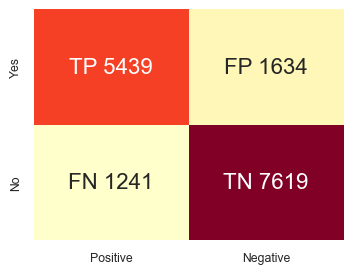

In [313]:
TP = ((y_pred == 1) & (y_test == 1)).sum()
TN = ((y_pred == 0) & (y_test == 0)).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
FN = ((y_pred == 0) & (y_test == 1)).sum()

def plot_confusion_matrix(confusion_matrix):
    [[TP, FP],[FN, TN]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])
    
    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative']) 
    
    return sns.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')

plt.figure(figsize = (4,3)) 
plot_confusion_matrix([[TP, FP],[FN, TN]])

Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class.

In [314]:
# precision and recall for y_pred and y_test
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = 2/(1/precision + 1/recall)
accuracy = TP + TN / (TP + TN + FP + FN)
print("precision", precision)
print("recall", recall)
print("f1 score", f1)
print("accuracy", accuracy)

precision 0.7689806305669448
recall 0.8142215568862275
f1 score 0.7909547007925544
accuracy 5439.478189920291


### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

In [315]:
def metrics(treshold):
    y_pred = lr.predict_proba(X_test)[:,1] > treshold
    
    TP = ((y_pred == 1) & (y_test == 1)).sum()
    TN = ((y_pred == 0) & (y_test == 0)).sum()
    FP = ((y_pred == 1) & (y_test == 0)).sum()
    FN = ((y_pred == 0) & (y_test == 1)).sum()
    
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = 2/(1/precision + 1/recall)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    negatives = (y_pred == 0).sum() / len(y_pred)
    positives = (y_pred == 1).sum() / len(y_pred)
    true_positive_rate = recall
    false_positive_rate = FP / (FP + TN)
    return [treshold, precision, recall, f1, accuracy, true_positive_rate, false_positive_rate, negatives, positives]

mtrics = np.array(list(map(
                    lambda treshold: metrics(treshold),
                    np.linspace(0.001,0.999,10))))
mtrics

array([[1.00000000e-03, 4.36858283e-01, 1.00000000e+00, 6.08074280e-01,
        4.59549363e-01, 1.00000000e+00, 9.30617097e-01, 4.02937300e-02,
        9.59706270e-01],
       [1.11888889e-01, 6.10561056e-01, 9.69311377e-01, 7.49204513e-01,
        7.27923178e-01, 9.69311377e-01, 4.46341727e-01, 3.34400301e-01,
        6.65599699e-01],
       [2.22777778e-01, 6.58712716e-01, 9.42215569e-01, 7.75361872e-01,
        7.71103998e-01, 9.42215569e-01, 3.52426240e-01, 4.00301262e-01,
        5.99698738e-01],
       [3.33666667e-01, 7.10821999e-01, 8.99700599e-01, 7.94185662e-01,
        8.04493818e-01, 8.99700599e-01, 2.64238625e-01, 4.69340363e-01,
        5.30659637e-01],
       [4.44555556e-01, 7.58337816e-01, 8.44161677e-01, 7.98951544e-01,
        8.21879119e-01, 8.44161677e-01, 1.94207284e-01, 5.33295676e-01,
        4.66704324e-01],
       [5.55444444e-01, 7.78469751e-01, 7.85928144e-01, 7.82181168e-01,
        8.16481516e-01, 7.85928144e-01, 1.61461148e-01, 5.76727547e-01,
        4.2

In [316]:
mtrics = pd.DataFrame(mtrics, columns=['treshold','precision', 'recall', 'f1', 'accuracy', 'true_positive_rate', 'false_positive_rate', 'negatives', 'positives'])
mtrics

,treshold,precision,recall,f1,accuracy,true_positive_rate,false_positive_rate,negatives,positives
0,0.001000,0.436858,1.000000,0.608074,0.459549,1.000000,0.930617,0.040294,0.959706
1,0.111889,0.610561,0.969311,0.749205,0.727923,0.969311,0.446342,0.334400,0.665600
2,0.222778,0.658713,0.942216,0.775362,0.771104,0.942216,0.352426,0.400301,0.599699
3,0.333667,0.710822,0.899701,0.794186,0.804494,0.899701,0.264239,0.469340,0.530660
4,0.444556,0.758338,0.844162,0.798952,0.821879,0.844162,0.194207,0.533296,0.466704
5,0.555444,0.778470,0.785928,0.782181,0.816482,0.785928,0.161461,0.576728,0.423272
6,0.666333,0.809057,0.679341,0.738547,0.798343,0.679341,0.115746,0.647963,0.352037
7,0.777222,0.864916,0.414072,0.560032,0.727233,0.414072,0.046688,0.799285,0.200715
8,0.888111,0.888889,0.149701,0.256246,0.635662,0.149701,0.013509,0.929392,0.070608
9,0.999000,0.869565,0.002994,0.005967,0.581811,0.002994,0.000324,0.998556,0.001444


<AxesSubplot: xlabel='treshold'>

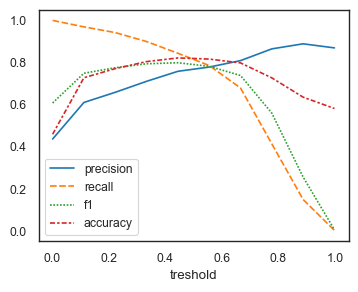

In [317]:
# g = mtrics.set_index('treshold').plot(kind='line')
plt.figure(figsize = (4,3)) 
sns.lineplot(data = mtrics.drop(['true_positive_rate','false_positive_rate','positives','negatives'],axis=1).set_index('treshold'))

In [318]:
mtrics_long = mtrics.set_index('treshold').stack().reset_index().rename(columns={'level_1':'metric', 0:'value'})
mtrics_long.head()

,treshold,metric,value
0,0.001,precision,0.436858
1,0.001,recall,1.000000
2,0.001,f1,0.608074
3,0.001,accuracy,0.459549
4,0.001,true_positive_rate,1.000000


/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.i

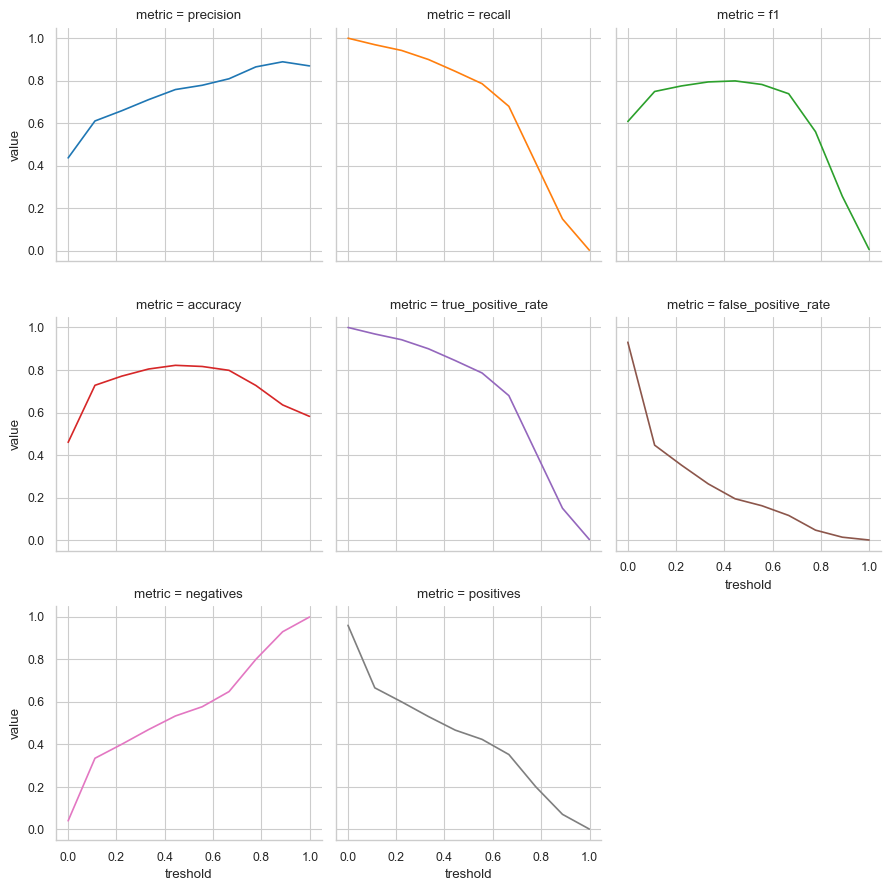

In [319]:
#seaborn lineplot with x = tresholds, and facet grid with columns of dfplot
sns.set_style('whitegrid')
g = sns.FacetGrid(mtrics_long, col='metric', hue='metric',col_wrap=3, sharey=True)
g.map(sns.lineplot, 'treshold', 'value')

<AxesSubplot: xlabel='false_positive_rate', ylabel='true_positive_rate'>

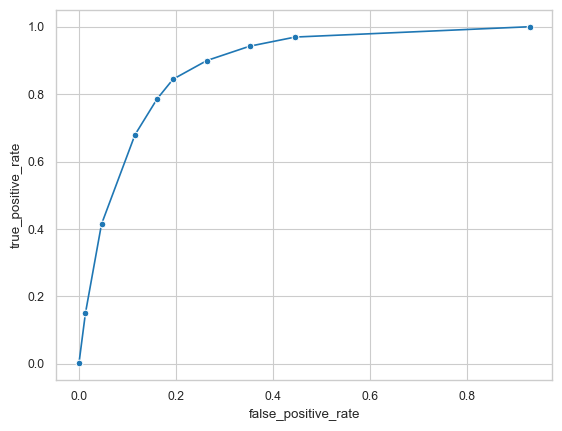

In [340]:
sns.lineplot(data = mtrics[['true_positive_rate','false_positive_rate', 'treshold']], x='false_positive_rate', y='true_positive_rate', marker='o')

In [321]:
print ('real negatives', (y_train==0).sum() )
print('real positives', (y_train==1).sum())

real negatives 36814
real positives 26914


As tresholds move away from 0.5, we require more or less probability to the positive class before we assign it. 

**The higher the treshold**, the more conservative we are with assigning the positive class (because we demand a lot more probability), **the more precision we have**. Precision is about how many positives are actually positive.

The higher the treshold, the more conservative we are with assigning the positive class, the less recall we have. Recall is about how many positives you leave out.

Accuracy is not affected too much, because it seems that just assigning everything as positive or all negative is accurate 50% - 60% of the time on the test set (vs 80% when you put a sensible treshold).

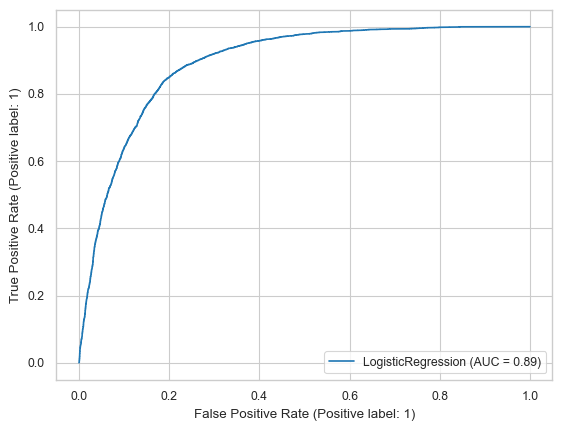

In [322]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)

### Class imbalance

Recall seems like a good metric as it is snsitive to the changes

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [323]:
x = lr.fit(X_train,y_train)
x.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 10000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'feature_names_in_': array(['age_upon_outcome_(years)', 'age_upon_intake_(years)',
        'intake_year', 'intake_number', 'time_in_shelter_days',
        'sex_upon_outcome_Intact Female', 'sex_upon_outcome_Intact Male',
        'sex_upon_outcome_Neutered Male', 'sex_upon_outcome_Spayed Female',
        'sex_upon_outcome_Unknown', 'animal_type_Bird', 'animal_type_Cat',
        'animal_type_Dog', 'animal_type_Other', 'intake_condition_Aged',
        'intake_condition_Feral', 'intake_condition_Injured',
        'intake_condition_Normal', 'intake_condition_Nursing',
        'intake_condition_Other', 'intake_condition_Pregnant',
        'intake_condition_Sick', 'intake_type_Euthanasia Request',
      

In [324]:
print(x.intercept_, x.coef_)

[-2.60393485] [[ 1.53636429 -1.9242284   0.20916235  0.05801773  0.72442266 -1.40698979
  -1.62823173  2.09680624  2.12943181 -1.22353657  2.44599769 -1.01341266
  -1.05586527 -0.4092398   0.93309709 -1.41890459 -0.0470991   0.46907782
   0.15111589 -0.25458909  0.15794384 -0.0231619  -0.08193234  1.93805691
  -0.63004905  1.07089568 -2.32949124  1.08249337  1.00671512 -0.53814061
  -0.36005135 -1.22353657]]


In [325]:
df3 = pd.DataFrame({'feature':X_cols,'coefficient':x.coef_[0]})
df3['coef_abs'] = df3['coefficient'].abs()
df3= df3.sort_values(by='coefficient',ascending=False)

Here sorted by how much theypositively predict the success class (outcome type Adoption)

Text(0.5, 1.0, 'Sup bro - the end and the beginning')

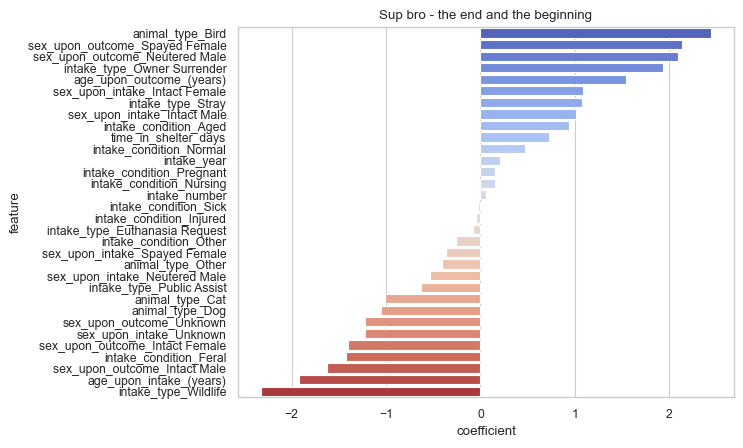

In [326]:
sns.barplot(data=df3,x='coefficient', y='feature', palette='coolwarm')
plt.title('Sup bro - the end and the beginning')


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) **F1 Score**
- b) Recall
- c) Precision
- d) Accuracy

- a) **F1 Score** - good because it's both prec and acc - by themselves they are misleading
- b) Recall - good, but needs precision to tell if it's overshooting
- c) Precision - good, but needs recall to tell if it's getting a lot of the positives
- d) Accuracy - bad, because even with unbalanced classes accuracy is "high"

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

In [327]:
print("prec", 100 / (100 + 10))
print('recall / True positive rate', 100 / (100 + 5))
print("accuracy", 150/165)
print("false positive rate = FP / (FP + TN)", 10/60)

prec 0.9090909090909091
recall / True positive rate 0.9523809523809523
accuracy 0.9090909090909091
false positive rate = FP / (FP + TN) 0.16666666666666666
